# Петър и вълкът: Въведение в Укрепващото Обучение

В този урок ще научим как да приложим укрепващо обучение за решаване на задача за намиране на път. Сценарият е вдъхновен от музикалната приказка [Петър и вълкът](https://en.wikipedia.org/wiki/Peter_and_the_Wolf) на руския композитор [Сергей Прокофиев](https://en.wikipedia.org/wiki/Sergei_Prokofiev). Това е история за младия пионер Петър, който смело излиза от дома си към горската поляна, за да преследва вълк. Ще обучим алгоритми за машинно обучение, които ще помогнат на Петър да изследва околността и да създаде оптимална карта за навигация.

Първо, нека импортираме няколко полезни библиотеки:


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## Преглед на Укрепващото Обучение

**Укрепващото Обучение** (RL) е техника за обучение, която ни позволява да научим оптималното поведение на **агент** в дадена **среда**, като провеждаме множество експерименти. Агентът в тази среда трябва да има някаква **цел**, определена чрез **функция за награда**.

## Средата

За простота, нека разгледаме света на Петър като квадратна дъска с размери `width` x `height`. Всяка клетка на тази дъска може да бъде:
* **земя**, върху която Петър и други същества могат да ходят
* **вода**, върху която очевидно не може да се ходи
* **дърво** или **трева** - място, където можете да си починете
* **ябълка**, която представлява нещо, което Петър би се радвал да намери, за да се нахрани
* **вълк**, който е опасен и трябва да се избягва

За да работим със средата, ще дефинираме клас, наречен `Board`. За да не претоварваме този тетраден файл, сме преместили целия код за работа с дъската в отделен модул `rlboard`, който сега ще импортираме. Можете да разгледате този модул, за да получите повече подробности за вътрешната реализация.


Нека сега създадем произволна дъска и да видим как изглежда:


In [4]:
# code block 1

## Действия и Политика

В нашия пример целта на Петър е да намери ябълка, като избягва вълка и други препятствия. Определете тези действия като речник и ги свържете с двойки от съответните промени в координатите.


In [5]:
# code block 2

Стратегията на нашия агент (Петър) се определя от така наречената **политика**. Нека разгледаме най-простата политика, наречена **случайна разходка**.

## Случайна разходка

Нека първо решим нашия проблем, като приложим стратегията на случайна разходка.


In [ ]:
# Let's run a random walk experiment several times and see the average number of steps taken: code block 3

In [7]:
# code block 4

## Функция за възнаграждение

За да направим нашата политика по-интелигентна, трябва да разберем кои ходове са "по-добри" от останалите.


In [8]:
#code block 5

## Q-Learning

Създайте Q-таблица или многомерен масив. Тъй като нашата дъска има размери `width` x `height`, можем да представим Q-таблицата чрез numpy масив с форма `width` x `height` x `len(actions)`:


In [9]:
# code block 6

Предайте Q-таблицата на функцията `plot`, за да визуализирате таблицата на дъската:


In [10]:
m.plot(Q)

NameError: name 'm' is not defined

## Същност на Q-Learning: Уравнение на Белман и алгоритъм за обучение

Напишете псевдокод за нашия алгоритъм за обучение:

* Инициализирайте Q-таблицата Q с равни стойности за всички състояния и действия
* Задайте скорост на обучение $\alpha\leftarrow 1$
* Повтаряйте симулацията многократно
   1. Започнете от случайна позиция
   1. Повтаряйте
        1. Изберете действие $a$ в състояние $s$
        2. Изпълнете действието, като преминете към ново състояние $s'$
        3. Ако срещнем условие за край на играта или общата награда е твърде малка - прекратете симулацията  
        4. Изчислете наградата $r$ в новото състояние
        5. Актуализирайте Q-функцията според уравнението на Белман: $Q(s,a)\leftarrow (1-\alpha)Q(s,a)+\alpha(r+\gamma\max_{a'}Q(s',a'))$
        6. $s\leftarrow s'$
        7. Актуализирайте общата награда и намалете $\alpha$.

## Експлоатация срещу изследване

Най-добрият подход е да се балансира между изследване и експлоатация. Докато научаваме повече за нашата среда, ще бъдем по-склонни да следваме оптималния маршрут, но е важно понякога да избираме неизследван път.

## Python имплементация

Сега сме готови да имплементираме алгоритъма за обучение. Преди това ни е необходима функция, която ще преобразува произволни числа в Q-таблицата във вектор от вероятности за съответните действия:


In [10]:
# code block 7

Добавяме малко количество `eps` към оригиналния вектор, за да избегнем деление на 0 в началния случай, когато всички компоненти на вектора са идентични.

Същинският алгоритъм за обучение ще изпълним за 5000 експеримента, наричани също **епохи**:


In [56]:

from IPython.display import clear_output

lpath = []

# code block 8

След изпълнението на този алгоритъм, Q-таблицата трябва да бъде актуализирана със стойности, които определят привлекателността на различните действия на всяка стъпка. Визуализирайте таблицата тук:


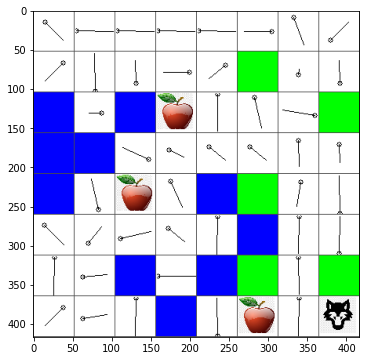

In [43]:
m.plot(Q)

## Проверка на политиката

Тъй като Q-таблицата изброява "привлекателността" на всяко действие във всяко състояние, е доста лесно да я използваме, за да определим ефективната навигация в нашия свят. В най-простия случай можем просто да изберем действието, което съответства на най-високата стойност в Q-таблицата:


In [13]:
# code block 9

2

Ако опитате кода по-горе няколко пъти, може да забележите, че понякога просто "забива" и трябва да натиснете бутона STOP в тетрадката, за да го прекъснете.

> **Задача 1:** Променете функцията `walk`, за да ограничите максималната дължина на пътя до определен брой стъпки (например, 100), и наблюдавайте как кодът по-горе връща тази стойност от време на време.

> **Задача 2:** Променете функцията `walk`, така че да не се връща на места, където вече е бил преди. Това ще предотврати "зациклянето" на `walk`, но агентът все пак може да се окаже "заклещен" на място, от което не може да избяга.


In [58]:

# code block 10

Average path length = 5.31, eaten by wolf: 0 times


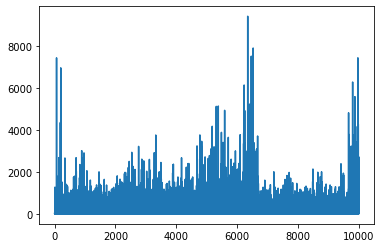

In [57]:
plt.plot(lpath)

## Упражнение
## По-реалистичен свят на Петър и вълка



---

**Отказ от отговорност**:  
Този документ е преведен с помощта на AI услуга за превод [Co-op Translator](https://github.com/Azure/co-op-translator). Въпреки че се стремим към точност, моля, имайте предвид, че автоматичните преводи може да съдържат грешки или неточности. Оригиналният документ на неговия изходен език трябва да се счита за авторитетен източник. За критична информация се препоръчва професионален превод от човек. Ние не носим отговорност за каквито и да е недоразумения или погрешни интерпретации, произтичащи от използването на този превод.
